# The advection equation
Numerical solution of the 1D advection problem
$$ \frac{\partial T}{\partial t} =  -c \frac{\partial T}{\partial x}$$ 
using an explicit forward in time, centred in space scheme

$T(x,t)$ represents the evolution of temperature distribution along the estuary over time

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## User defined parameters

In [5]:
# problem parameters
c=1       # Advection speed [m s-1]
dx=150      # X resolution [m]
dt=100      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days]
xmax=10.0e3 # length of the basin [m]

# Parameters of the initial temperature distribution
T0 = 15.        # baseline temperature [degC]
sigma = 1000.   # width at half amplitude [m]
A = 5.          # amplitude [degC]

## Initial function and grid specifications
The initial shape of the temperature distribution is a Gaussian peak function

In [6]:
# Spatial shape of the temperature disturbance
def Gaussian(x):
    y = T0+A*np.exp(-(x/sigma)**2)
    return y

The resulting space-time grid depends on the parameters above

In [7]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
T = np.zeros([IM,NT])     # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical speed DX/DT = ',dx/dt,' m/s')
print('Physical speed = ',c,' m/s')
print('Courant number = ',c*dt/dx)

Grid steps :  134
Number of time steps :  87
Timestep =  100  s
Max numerical speed DX/DT =  1.5  m/s
Physical speed =  1  m/s
Courant number =  0.6666666666666666


## Numerical solution
Note that this code stores the solution at all times in array T for educational purposes. This allows to plot the solution at the different time steps and see how it evolves.

*This method is very inefficient for any application because it uses a lot of memory. In modern computer codes only a few time records are hold in memory. The instantaneous solution is often temporarely stored for computing time averages and then discarded.*

This part of the code is the topic of some questions found in the lecture notes

In [8]:
# Compute the numerical solution using a time loop over the number of time steps
T[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1):
    # Question 1
    T[0,n+1]  = T0
    T[-1,n+1] = T0
    # Question 2 and Question 3
    rhs = -c*(T[2:,n]-T[:-2,n])/(2.*dx) # L1
    T[1:-1,n+1] = T[1:-1,n] + rhs*dt    # L2

## Plot the result using a matplotlib animation
The animation below displays the evolution of the solution and compares it with the analytical solution

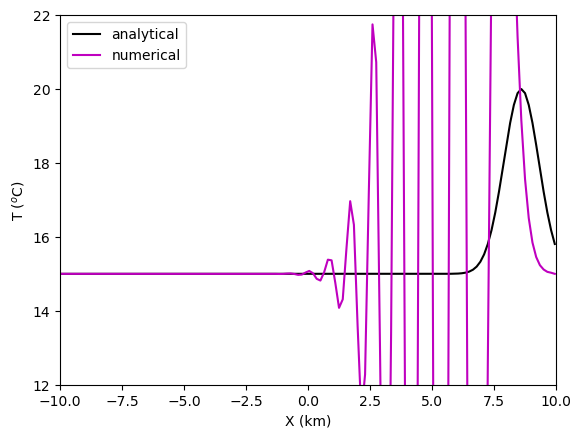

In [9]:
fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/1000, xmax/1000, T0-3, T0+7])
# first plot the initial conditions and set the line attributes
line, = ax.plot(x/1000., Gaussian(x),'k',label='analytical')
sol, = ax.plot(x/1000., T[:,0],'m',label='numerical')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')
plt.legend(loc='upper left')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the analytical solution
    sol.set_ydata(T[:,i])  # update the numerical solution
    return line,sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# To save the animation, use e.g.
# ani.save("movie.mp4")
# or
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

## Question 6

### 6.2 Increasing the wave speed without increasing the time step and the spatial domain leads to a much quicker and bigger divergence of the numerical solution from the analytical.